<a href="https://colab.research.google.com/github/JuanDiegoBH/Examen_Final/blob/main/ExamenFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Establezca 2 modelos de clasificación para el data Iris


In [126]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import multilabel_confusion_matrix as mcm
from sklearn import datasets
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
import numpy as np

##Cargar base de datos
df_iris = datasets.load_iris()
X = df_iris.data 
y = df_iris.target 
print(np.shape(X))
print(np.shape(y))
print('*'*100)
y = np.reshape(y,(150,1))
print(np.shape(y))

#Graph 
graph = px.scatter(x=X[:,0], y=X[:,1], color = np.reshape(y,(150,)), title="Types of Iris flower")
graph.update_traces(marker_size = 11)
graph.show()

(150, 4)
(150,)
****************************************************************************************************
(150, 1)


###1.   Modelo SVC




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[[[30  0]
  [ 0 15]]

 [[29  0]
  [ 1 15]]

 [[30  1]
  [ 0 14]]]
Ingresa el valor de tu Sepal Length: 2
Ingresa el valor de tu Sepal Length: 2
Ingresa el valor de tu Petal Length: 3
Ingresa el valor de tu Petal Width: 2
Tu rpta. es: [1]


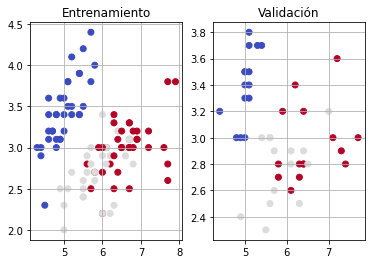

In [129]:
##Separación de la base de datos
xtrain,xtest,ytrain,ytest = tts(X,y,test_size =.30, random_state = 5)

#Definir modelo
svc_iris = SVC(gamma = 'scale')

#Entrenar
svc_iris.fit(xtrain,ytrain)

#Predecir
y_ptrain = svc_iris.predict(xtrain)
y_ptest = svc_iris.predict(xtest)

#Multilabel Confusion Matrix
mcm_1 = mcm(ytest,y_ptest)
print(mcm_1)

#Graficar
fig, ax = plt.subplots(1,2)
ax[0].scatter(xtrain[:, 0], xtrain[:, 1], c=y_ptrain, cmap=plt.cm.coolwarm)
ax[1].scatter(xtest[:, 0], xtest[:, 1], c=y_ptest, cmap=plt.cm.coolwarm)
ax[0].set_title("Entrenamiento")
ax[1].set_title("Validación")
ax[0].grid()
ax[1].grid()
fig.show()


#Ejemplo
Sepal_Length = float(input("Ingresa el valor de tu Sepal Length: "))
Sepal_Width = float(input("Ingresa el valor de tu Sepal Length: "))
Petal_Length = float(input("Ingresa el valor de tu Petal Length: "))
Petal_Width = float(input("Ingresa el valor de tu Petal Width: "))

rpta = svc_iris.predict([[Sepal_Length, Sepal_Width, Petal_Length, Petal_Width]])
print("Tu rpta. es:", rpta)

###2. Modelo RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import r2_score,mean_squared_error

#Agrupación
xtrain,xtest,ytrain,ytest = tts(X,y,random_state = 42, test_size = .25)

#MODELACIÓN
RF_iris = rfc(random_state=5)

#ENTRENAMIENTO
RF_iris.fit(xtrain,ytrain)

#PREDICCIÓN
y_ptest = RF_iris.predict(xtest)
y_ptrain = RF_iris.predict(xtrain)

#VALIDACIÓN
mcm_2 = mcm(ytest,y_ptest)
print(mcm_2)

#Graficar
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.grid()
plt.show()

#Ejemplo
Sepal_Length = float(input("Ingresa el valor de tu Sepal Length:"))
Sepal_Width = float(input("Ingresa el valor de tu Sepal Length:"))
Petal_Length = float(input("Ingresa el valor de tu Petal Length: "))
Petal_Width = float(input("Ingresa el valor de tu Petal Width: "))

rpta = RF_iris.predict([[Sepal_Length, Sepal_Width, Petal_Length, Petal_Width]])
print("Tu rpta. es:", rpta)


In [77]:
"""
Evalúa 2 modelos: Uno con PCA y otro sin PCA para el modelo de clasificación del dataset melbournhouses
"""
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import multilabel_confusion_matrix as mcm
from sklearn.preprocessing import LabelEncoder as le
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from pandas import get_dummies
import pandas as pd
import numpy as np

df_melbourn = pd.read_csv("https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/melbournehouses.csv")
df_melbourn.dropna(subset=['Car'], inplace=True)
def norm_zero_one(df):
    return (df - df.min()) * 1.0 / (df.max() - df.min())

for m in ['Price','Landsize','Distance']:
  df_melbourn[m] = norm_zero_one(df_melbourn[m])

X = np.c_[df_melbourn['Price'],df_melbourn['Landsize'],df_melbourn['Distance']]

for i in ['Type']:
  globals()['dummies'+ str(i)] = pd.get_dummies(df_melbourn[i], prefix = i,dummy_na=False)

for i in ['Rooms','Bathroom','Car']:
  globals()['standar_' + str(i)] = df_melbourn[i]

normal_data = np.c_[standar_Rooms,standar_Bathroom,standar_Car]
normalizer1 = Normalizer()
normalizer1.fit(normal_data)
normal_data = normalizer1.transform(normal_data)

X = np.c_[X,dummiesMethod,dummiesType,normal_data]
print(np.shape(X))
y = np.array(df_melbourn['Price'])
print(np.shape(y))

(13518, 14)
(13518,)


###Con PCA

[1.56477846e-01 4.66497619e-04 5.19750520e-02 0.00000000e+00
 1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 0.00000000e+00 0.00000000e+00 8.16496581e-01
 4.08248290e-01 4.08248290e-01]
****************************************************************************************************
[-0.49174112 -0.21915878]


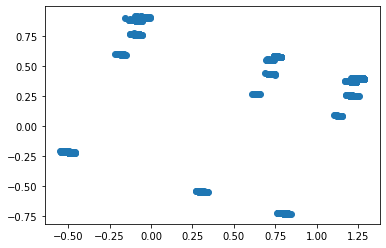

In [78]:
from sklearn.decomposition import PCA
#Componentes principales.
pca = PCA(n_components=2)

#Matriz de autovectores
pca.fit(X)
Xpca = pca.transform(X)

#Reducción DIFERENCIAR los PCAs
print(X[0,:])
print('*'*100)
print(Xpca[0,:])

#Gráfica
plt.scatter(x = Xpca[:,0], y = Xpca[:,1])
plt.show()

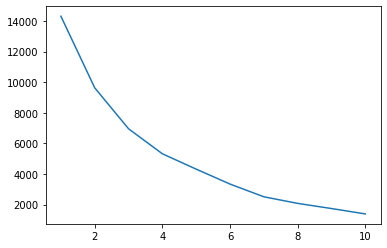

In [79]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
##K-means
list_inercia =[]
for i in range(1,11):
  k_means = KMeans(n_clusters=i) 
  k_means.fit(X)
  list_inercia.append(k_means.inertia_)

plt.plot(range(1,11),list_inercia)
plt.show()

## K = 4
k_means = KMeans(n_clusters=4)
k_means.fit(X)
labels = k_means.labels_

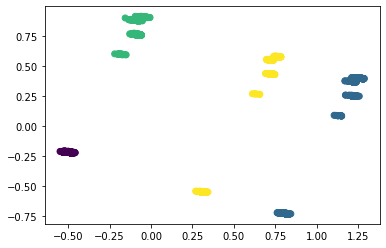

In [80]:
plt.scatter(Xpca[:,0],Xpca[:,1], c = labels)
plt.show()

###Sin PCA

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[[[26  0]
  [ 0 19]]

 [[32  0]
  [ 0 13]]

 [[32  0]
  [ 0 13]]]


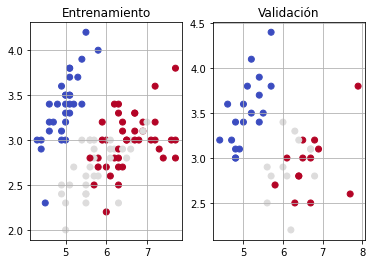

In [124]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split as tts

y =np.reshape(y,(len(y),1))

#Separación
xtrain,xtest,ytrain,ytest = tts(X,y,test_size =.30, random_state = 42)

#Modelación y Entrenamiento 
knn_noPCA = knn(n_neighbors=5)
knn_noPCA.fit(xtrain,ytrain)

#PREDICCIÓN
y_ptest = knn_noPCA.predict(xtest)
y_ptrain = knn_noPCA.predict(xtrain)

#VALIDACIÓN
mcm_2 = mcm(ytest,y_ptest)
print(mcm_2)

#Gráfico
fig, ax = plt.subplots(1,2)
ax[0].scatter(xtrain[:, 0], xtrain[:, 1], c=y_ptrain, cmap=plt.cm.coolwarm)
ax[1].scatter(xtest[:, 0], xtest[:, 1], c=y_ptest, cmap=plt.cm.coolwarm)
ax[0].set_title("Entrenamiento")
ax[1].set_title("Validación")
ax[0].grid()
ax[1].grid()
fig.show()


In [293]:
"""
¿Existe sobreajuste al aplicar un modelo de RF con n = 200 para el modelo de wine.csv? 
"""
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import multilabel_confusion_matrix as mcm
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from pandas import notna
import pandas as pd
import numpy as np

##Cargar base de datos
df_wine = pd.read_excel('/content/drive/MyDrive/Python/wine.xlsx')
display(df_wine.tail())
df_wine.dropna(subset=["price"], inplace=True)

labelencoder = LabelEncoder()
for i in ['country','province','variety']:
  df_wine.dropna(subset=[i], inplace=True)
  df_wine[i] = labelencoder.fit_transform(df_wine[i])

X = df_wine[['country','points','province','variety']]
print(X)
y = df_wine['price']

def norm_zero_one(df):
    return (df - df.min()) * 1.0 / (df.max() - df.min())

for i in ['country','points','province','variety']:
  X[i] = norm_zero_one(X[i])

#Agrupación
xtrain,xtest,ytrain,ytest = tts(X,y, test_size = .25)

#MODELACIÓN
RF_200 = rfr(n_estimators=200)

#ENTRENAMIENTO
RF_200.fit(xtrain,ytrain)

#PREDICCION
y_ptest = RF_200.predict(xtest)
y_ptrain = RF_200.predict(xtrain)

#VALIDACIÓN
r2_test =r2_score(ytest,y_ptest) 
r2_train = r2_score(ytrain, y_ptrain)
print(r2_train,r2_test)

#SUBAJUSTE O SOBREAJUSTE 
if r2_test < .5:
  print("Conclusión: Existe Subajuste en el modelo")
elif r2_train > r2_test:
  print(r2_train - r2_test)
  print("Conclusión: Existe Sobreajuste en el modelo")
elif r2_train <= r2_test and r2_train > .5 and r2_test > .5:
  print("Conclusión: El modelo está eficientemente ajustado")

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset
150929,150929,Italy,More Pinot Grigios should taste like this. A r...,NaN,90,15.0,Northeastern Italy,Alto Adige,NaN,Pinot Grigio,Alois Lageder


        country  points  province  variety
0            42      96        51       69
1            39      96       273      541
2            42      96        51      458
3            42      96       281      394
4            14      95       312      414
...         ...     ...       ...      ...
150925       21      91       358      604
150926       14      91        72      105
150927       21      91       358      604
150928       14      90        72      105
150929       21      90       271      388

[137230 rows x 4 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.6298659799197373 0.379339720184354
Conclusión: Existe Subajuste en el modelo


In [ ]:
"""
Puedes graficar un modelo de deep learning para la dataset de breast-cancer
"""


In [ ]:
"""
Crea una función que aplane la ruta de una imágen
"""
import matplotlib.pyplot as plt
import numpy as np
def aplanar_img():
  ruta = input("Ingrese la ruta de la imagen: ")
  img = plt.imread(ruta)
  print(np.shape(img))
  print('*'*100)
  img_flat = img.flatten()
  print(np.shape(img_flat))
